In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
registration = pd.read_csv('data/Registration.csv')
appUninstalled = pd.read_csv('data/AppUninstalled.csv')
UTMVisited = pd.read_csv('data/UTMVisited.csv')
videoStarted = pd.read_csv('data/VideoStarted.csv')
appLaunched = pd.read_csv('data/AppLaunched.csv')
videoDetails = pd.read_csv('data/VideoDetails.csv')

In [4]:
videoDetails['Sec_Of_Day'] = videoDetails['Minute_Of_Day'] * 60 + videoDetails['Second']
videoStarted['Sec_Of_Day'] = videoStarted['Minute_Of_Day'] * 60 + videoStarted['Second']
registration['Sec_Of_Day'] = registration['Minute_Of_Day'] * 60 + registration['Second']
appLaunched['Sec_Of_Day'] = appLaunched['Minute_Of_Day'] * 60 + appLaunched['Second']
appUninstalled['Sec_Of_Day'] = appUninstalled['Minute_Of_Day'] * 60 + appUninstalled['Second']
UTMVisited['Sec_Of_Day'] = UTMVisited['Minute_Of_Day'] * 60 + UTMVisited['Second']

In [5]:
data1 = pd.DataFrame(videoDetails[['UserId', 'Date', 'Sec_Of_Day', 'Country', 'State', 'Device', 'OS']]
                     .append(videoStarted[['UserId', 'Date', 'Sec_Of_Day', 'Country', 'State', 'Device', 'OS']])
                     .append(registration[['UserId', 'Date', 'Sec_Of_Day', 'Country', 'State', 'Device', 'OS']])
                     .append(appLaunched[['UserId', 'Date', 'Sec_Of_Day', 'Country', 'State', 'Device', 'OS']])
                     .append(appUninstalled[['UserId', 'Date', 'Sec_Of_Day', 'Country', 'State', 'Device', 'OS']])
                     .append(UTMVisited[['UserId', 'Date', 'Sec_Of_Day', 'Country', 'State', 'Device', 'OS']])
                     .groupby('UserId').last().reset_index())
data1.shape

(466124, 7)

In [6]:
data1.rename(columns = {'Date': 'Last_Date', 'Sec_Of_Day': 'Last_Sec_Of_Day', 'Device': 'Last_Device', 'OS': 'Last_OS'}, inplace = True)
data1.head()

,UserId,Last_Date,Last_Sec_Of_Day,Country,State,Last_Device,Last_OS
0,0000146e97c32d369268e5ba5f4b907c,20170228,54136,1,36,1,1
1,0000193a728fd00b6cff91b8840bbf8d,20170209,7380,14,1,1,1
2,00001e3213a2159ed06f1db689c54fbb,20170213,85648,40,33,1,1
3,00004010d92c2f13b824237bc323d58b,20170430,77992,40,33,2,1
4,00004dd911aafdc3f3cd64a490bd56f1,20170506,51804,1,35,1,1


In [7]:
UTMVisited.shape

(495850, 9)

In [8]:

NumberOfAdCampaignInteracted = pd.DataFrame(UTMVisited['UserId'].value_counts())
NumberOfAdCampaignInteracted.rename(columns = {"UserId": "NumberOfAdCampaignInteracted"}, inplace = True)
UserId = NumberOfAdCampaignInteracted.index
NumberOfAdCampaignInteracted['UserId'] = UserId
NumberOfAdCampaignInteracted = NumberOfAdCampaignInteracted.reset_index(drop=True)
NumberOfAdCampaignInteracted.head()

,NumberOfAdCampaignInteracted,UserId
0,2563,78f893c7638ae6da111483154ea8ae99
1,2276,af7956df6077143592cb1b4f43c41da9
2,2070,52665f1c3939fc8759f1b4093e6a2acd
3,1595,003385ae5722ef2280de879a62c7cc8e
4,1440,e46a7f614781f07f086b92380c8770f1


In [9]:
NumberOfAdCampaignInteracted.shape

(281612, 2)

In [10]:
registration.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Status,Sec_Of_Day
0,d168e2b924124feaad13eae44a68fce9,20170106,0,8,35,1,1,2,Complete,8
1,deed7490952a6746610ee2ee9fd219b7,20170106,0,8,7,40,1,1,Completed,8
2,13d9f55e297d7d9c219fbe9085e1006c,20170106,0,28,35,1,1,2,Complete,28
3,fccc2c0abf5afabf242a70df7b4c9e69,20170106,0,52,39,1,1,1,Completed,52
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,0,52,38,1,1,1,Not Completed,52


In [11]:
registration.shape

(329579, 10)

In [12]:
registration['Status'].value_counts()

Completed        205853
Not Completed    100608
Complete          23118
Name: Status, dtype: int64

In [13]:
appUninstalled.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Sec_Of_Day
0,0d5f4cc176a4e1c648a9b9b5dbe21d69,20170106,0,0,47,1,1,1,0
1,807018f66aba113be576eb8afa4ea4b6,20170106,0,0,6,1,1,1,0
2,763e66e04918d8b8a7e69a778f5a742a,20170106,1,0,41,1,1,1,60
3,4ee1ed456fa04fc42168a9787b54b549,20170106,1,0,37,1,1,1,60
4,253e758a5557f9de890e814d901f6906,20170106,6,0,46,40,1,1,360


In [14]:
UTMVisited.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Sec_Of_Day
0,66d4abf4f3b733c27591b3f47c85eff7,20170106,0,52,37,1,1,1,52
1,1a40d7e5b34131b097fac80cf982241b,20170106,0,56,40,1,1,1,56
2,b7b3c1ce773a13b52d39429e305ea615,20170106,1,16,35,1,1,1,76
3,3f486a89433a02b96ab13b16c82e39fd,20170106,1,32,35,1,1,1,92
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,1,32,38,1,1,1,92


In [15]:
appLaunched.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Sec_Of_Day
0,a27134c322d4f56dabc106a6847cb96b,20170106,0,4,50,1,1,2,4
1,aab39ad0874c59cc388525d511667f9d,20170106,0,8,40,1,1,2,8
2,f717dc3f757dc18cc0c3f27ed3e94ef8,20170106,0,12,35,1,1,2,12
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,20170106,0,20,40,1,2,2,20
4,71f05822bb699a04b694dd30265fdf73,20170106,0,20,35,1,1,2,20


In [16]:
videoDetails.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day
0,dc93d200565e5bf6e6fc55adb1c5ba06,20170106,0,4,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,4
1,12060efd8b68ea562b265d0129a8af1f,20170106,0,16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,16
2,9151ab2a901458f27e36548d4a8dc011,20170106,0,20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,20
3,1faf0ce0b98e02e1568702f516f01a78,20170106,0,20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,20
4,435d41ae019cb8db785483793859c9a8,20170106,0,20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,20


In [17]:
videoDetails['Category'].value_counts()

 vod        3516223
 linear      179228
Name: Category, dtype: int64

In [18]:
videoStarted.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day
0,0280dfdd112732a3ac12b12dc770b7af,20170106,0,8,35,Romance,vod,Movies,1,1,2,36a27b379622f342ec87f9aafadb8f94,8
1,435d41ae019cb8db785483793859c9a8,20170106,0,28,35,Anime,vod,TV Shows,1,1,1,a4d9b88c7ed63d723c70b358a857719c,28
2,1faf0ce0b98e02e1568702f516f01a78,20170106,0,36,35,Drama,vod,TV Shows,1,1,1,806660cb47633263a24bbc53238a9a53,36
3,3ec691b9d2b5d53ef965fe59b1900b30,20170106,0,48,35,Drama,vod,TV Shows,1,2,2,385114825a85d6878e7a0978f9ba5546,48
4,ff230d487a7139b65f33b54a4cbd2d9e,20170106,0,56,35,Comedy,vod,Movies,1,1,1,368a480ec0ae105aee8320dd93483e39,56


In [19]:
videoStarted['Category'].value_counts()

 vod        1130154
 linear      666371
Name: Category, dtype: int64

In [20]:
videoDetails['ProgramType'].value_counts()

 TV Shows     3117020
 Movies        398975
 Channels      179228
                  228
Name: ProgramType, dtype: int64

In [21]:
videoStarted['ProgramType'].value_counts()

 TV Shows    967963
 Channels    666371
 Movies      162191
Name: ProgramType, dtype: int64

In [22]:
videoDetails['ProgramType'] = videoDetails['ProgramType'].astype(object).replace("  ", "UNKNOWN Type")
videoStarted['ProgramType'] = videoStarted['ProgramType'].astype(object).replace("  ", "UNKNOWN Type")

In [23]:
videoDetails['Genre'] = videoDetails['Genre'].astype(object).replace("  ", "UNKNOWN Genre")
videoStarted['Genre'] = videoStarted['Genre'].astype(object).replace("  ", "UNKNOWN Genre")

In [24]:
programType_valueCount=videoDetails['ProgramType'].value_counts()
programType_valueCount

 TV Shows       3117020
 Movies          398975
 Channels        179228
UNKNOWN Type        228
Name: ProgramType, dtype: int64

In [25]:
ax = data['attacker_outcome'].value_counts().plot(kind='bar', figsize=(10,7),
                                                  color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Do attackers usually win or loose?", fontsize=18)
ax.set_ylabel("Number of Battles", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')

NameError: name 'data' is not defined

In [26]:
programType_valueCount  = videoDetails.groupby('ProgramType')['VideoId'].count()
programType_valueCount

ProgramType
 Channels        179228
 Movies          398975
 TV Shows       3117020
UNKNOWN Type        228
Name: VideoId, dtype: int64

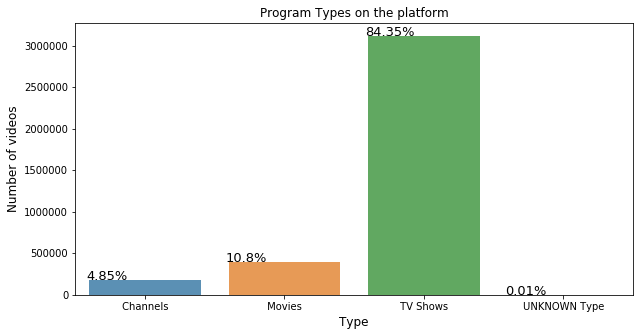

In [27]:
programType_valueCount  = videoDetails.groupby('ProgramType')['VideoId'].count()
plt.figure(figsize=(10,5))
ax=sns.barplot(programType_valueCount.index, programType_valueCount.values, alpha=0.8);
ax.set_alpha(0.8)
ax.set_title('Program Types on the platform')
ax.set_ylabel('Number of videos', fontsize=12)
ax.set_xlabel('Type', fontsize=12)
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.02, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='Black')


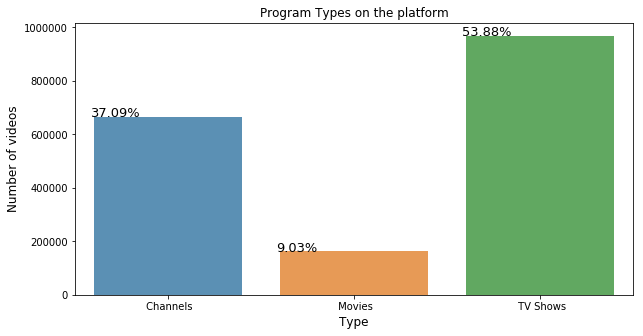

In [45]:
programTypeS_valueCount  =videoStarted.groupby('ProgramType')['VideoId'].count()
plt.figure(figsize=(10,5))
ax=sns.barplot(programTypeS_valueCount.index, programTypeS_valueCount.values, alpha=0.8)

ax.set_alpha(0.8)
ax.set_title('Program Types on the platform')
ax.set_ylabel('Number of videos', fontsize=12)
ax.set_xlabel('Type', fontsize=12)
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.02, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='Black')


In [46]:
videoDetails.groupby('Genre')['VideoId'].count()

Genre
 Action                            103665
 Adventure                             51
 Animation                          32804
 Anime                             413672
 Athletics                              6
 Automotive                          3403
 Award Show                            53
 Badminton                           2936
 Comedy                            188614
 Concerts                             138
 Cooking                              214
 Crime                               7536
 Current Affairs / General           1067
 Documentary                         4638
 Drama                            2354477
 Entertainment                       4241
 Entertainment News                   143
 Family                             10650
 Fashion                             1028
 Food                                1372
 Football                            2400
 Game Show                             87
 General                              480
 Golf                       

In [47]:
videoDetails.columns

Index(['UserId', 'Date', 'Minute_Of_Day', 'Second', 'State', 'Genre',
       'Category', 'ProgramType', 'Country', 'Device', 'OS', 'VideoId',
       'Sec_Of_Day', 'Timestamp', 'VStatus'],
      dtype='object')

In [48]:
videoDetails.groupby('Country')['Genre'].count()

Country
0          494
1      2688671
2         2797
5          132
7           61
9           36
10          51
11          16
12         209
14        4393
15         190
16         137
23           9
24           5
29          10
30        2399
36          10
39           1
40      928251
42           3
46         398
47         586
54          13
57          27
65          27
73          36
74          40
86           6
255      66443
Name: Genre, dtype: int64

In [49]:
videoDetails.groupby('Genre')['Country'].count()

Genre
 Action                            103665
 Adventure                             51
 Animation                          32804
 Anime                             413672
 Athletics                              6
 Automotive                          3403
 Award Show                            53
 Badminton                           2936
 Comedy                            188614
 Concerts                             138
 Cooking                              214
 Crime                               7536
 Current Affairs / General           1067
 Documentary                         4638
 Drama                            2354477
 Entertainment                       4241
 Entertainment News                   143
 Family                             10650
 Fashion                             1028
 Food                                1372
 Football                            2400
 Game Show                             87
 General                              480
 Golf                       

In [50]:
def time_stamp (df, date_col, min_col, sec_col):
    '''
    Returns dataframe with timestamp after combining the date, minute and sec column for the given dataframe
    '''
    df[date_col] = pd.to_datetime(df[date_col].astype(str))
    df[min_col] = pd.to_timedelta(df[min_col], unit='m')
    df[sec_col] = pd.to_timedelta(df[sec_col], unit='s')
    df['Timestamp'] = df[date_col] + df[min_col] + df[sec_col]
    return df

In [51]:
def user_rating(videos):
    if 1 <= videos <= 300:
        return 'very_low'
    elif 301<= videos <=600:
        return 'moderate'
    elif 601<= videos <=900:
        return 'high'
    elif 901<= videos:
        return 'very high'

In [52]:
videoDetails.columns

Index(['UserId', 'Date', 'Minute_Of_Day', 'Second', 'State', 'Genre',
       'Category', 'ProgramType', 'Country', 'Device', 'OS', 'VideoId',
       'Sec_Of_Day', 'Timestamp', 'VStatus'],
      dtype='object')

In [53]:
videoDetails_timestamp=time_stamp(videoDetails,'Date','Minute_Of_Day','Second')
videoDetails_timestamp.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day,Timestamp,VStatus
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017-01-06,0 days,00:00:04,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,4,2017-01-06 00:00:04,Details
1,12060efd8b68ea562b265d0129a8af1f,2017-01-06,0 days,00:00:16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,16,2017-01-06 00:00:16,Details
2,9151ab2a901458f27e36548d4a8dc011,2017-01-06,0 days,00:00:20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,20,2017-01-06 00:00:20,Details
3,1faf0ce0b98e02e1568702f516f01a78,2017-01-06,0 days,00:00:20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,20,2017-01-06 00:00:20,Details
4,435d41ae019cb8db785483793859c9a8,2017-01-06,0 days,00:00:20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,20,2017-01-06 00:00:20,Details


In [54]:
videoStarted_timestamp=time_stamp(videoStarted,'Date','Minute_Of_Day','Second')
videoStarted_timestamp.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day,Timestamp,VStatus
0,0280dfdd112732a3ac12b12dc770b7af,2017-01-06,0 days,00:00:08,35,Romance,vod,Movies,1,1,2,36a27b379622f342ec87f9aafadb8f94,8,2017-01-06 00:00:08,Started
1,435d41ae019cb8db785483793859c9a8,2017-01-06,0 days,00:00:28,35,Anime,vod,TV Shows,1,1,1,a4d9b88c7ed63d723c70b358a857719c,28,2017-01-06 00:00:28,Started
2,1faf0ce0b98e02e1568702f516f01a78,2017-01-06,0 days,00:00:36,35,Drama,vod,TV Shows,1,1,1,806660cb47633263a24bbc53238a9a53,36,2017-01-06 00:00:36,Started
3,3ec691b9d2b5d53ef965fe59b1900b30,2017-01-06,0 days,00:00:48,35,Drama,vod,TV Shows,1,2,2,385114825a85d6878e7a0978f9ba5546,48,2017-01-06 00:00:48,Started
4,ff230d487a7139b65f33b54a4cbd2d9e,2017-01-06,0 days,00:00:56,35,Comedy,vod,Movies,1,1,1,368a480ec0ae105aee8320dd93483e39,56,2017-01-06 00:00:56,Started


In [55]:
videoDetails_timestamp['VStatus']='Details'

In [56]:
videoDetails_timestamp.shape

(3695451, 15)

In [57]:
videoStarted_timestamp['VStatus']='Started'

In [58]:
videoStarted_timestamp.shape

(1796525, 15)

In [59]:
frames = [videoDetails_timestamp, videoStarted_timestamp]

In [60]:
fullVideoInfo=pd.concat(frames)
fullVideoInfo.shape

(5491976, 15)

In [61]:
fullVideoInfo.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day,Timestamp,VStatus
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017-01-06,0 days,00:00:04,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,4,2017-01-06 00:00:04,Details
1,12060efd8b68ea562b265d0129a8af1f,2017-01-06,0 days,00:00:16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,16,2017-01-06 00:00:16,Details
2,9151ab2a901458f27e36548d4a8dc011,2017-01-06,0 days,00:00:20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,20,2017-01-06 00:00:20,Details
3,1faf0ce0b98e02e1568702f516f01a78,2017-01-06,0 days,00:00:20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,20,2017-01-06 00:00:20,Details
4,435d41ae019cb8db785483793859c9a8,2017-01-06,0 days,00:00:20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,20,2017-01-06 00:00:20,Details


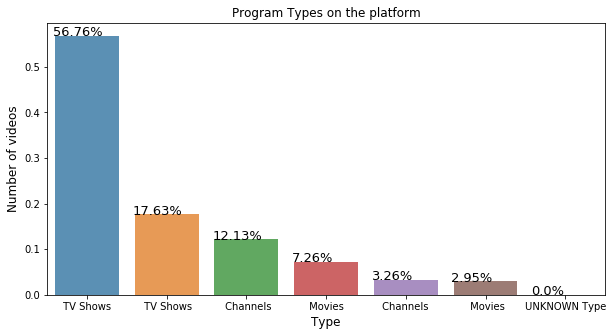

In [62]:
fullVideos_programType_valueCount =fullVideoInfo['ProgramType'].value_counts(normalize=True)
plt.figure(figsize=(10,5))
ax=sns.barplot(fullVideos_programType_valueCount.index, fullVideos_programType_valueCount.values, alpha=0.8)
ax.set_title('Program Types on the platform')
ax.set_ylabel('Number of videos', fontsize=12)
ax.set_xlabel('Type', fontsize=12)
# find the values and append to list
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='black')




Text(0.5, 0, 'Type')

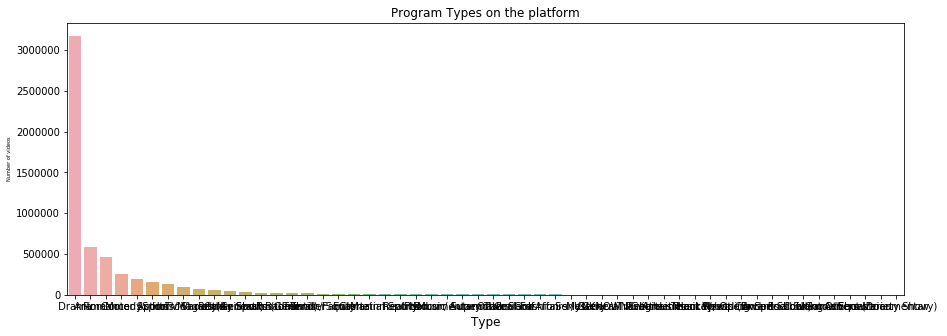

In [63]:
fullVideos_Genre_valueCount =fullVideoInfo['Genre'].value_counts()
plt.figure(figsize=(15,5))
ax=sns.barplot(fullVideos_Genre_valueCount.index, fullVideos_Genre_valueCount.values, alpha=0.8)

ax.set_title('Program Types on the platform')
ax.set_ylabel('Number of videos', fontsize=5)
ax.set_xlabel('Type', fontsize=12)
# find the values and append to list



In [64]:
fullVideoInfo['ProgramType'].unique()

array([' TV Shows ', ' Movies ', ' Channels ', 'UNKNOWN Type', ' Movies',
       ' TV Shows', ' Channels'], dtype=object)

In [65]:
fullVideoInfo['ProgramType'] = fullVideoInfo['ProgramType'].apply(lambda x : x.strip())


In [66]:
fullVideoInfo['ProgramType'].unique()

array(['TV Shows', 'Movies', 'Channels', 'UNKNOWN Type'], dtype=object)

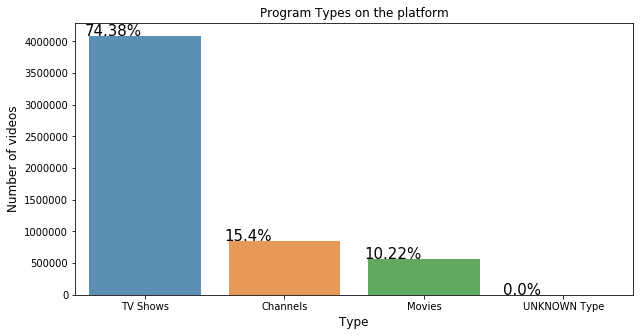

In [67]:
fullVideos_programType_valueCount =fullVideoInfo['ProgramType'].value_counts()
plt.figure(figsize=(10,5))
ax=sns.barplot(fullVideos_programType_valueCount.index, fullVideos_programType_valueCount.values, alpha=0.8)
ax.set_title('Program Types on the platform')
ax.set_ylabel('Number of videos', fontsize=12)
ax.set_xlabel('Type', fontsize=12)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')
plt.show()

In [68]:
fullVideoInfo.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day,Timestamp,VStatus
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017-01-06,0 days,00:00:04,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,4,2017-01-06 00:00:04,Details
1,12060efd8b68ea562b265d0129a8af1f,2017-01-06,0 days,00:00:16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,16,2017-01-06 00:00:16,Details
2,9151ab2a901458f27e36548d4a8dc011,2017-01-06,0 days,00:00:20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,20,2017-01-06 00:00:20,Details
3,1faf0ce0b98e02e1568702f516f01a78,2017-01-06,0 days,00:00:20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,20,2017-01-06 00:00:20,Details
4,435d41ae019cb8db785483793859c9a8,2017-01-06,0 days,00:00:20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,20,2017-01-06 00:00:20,Details


In [69]:
df_new = videoDetails_timestamp[videoDetails_timestamp.groupby('VideoId').Timestamp.transform('min') == videoDetails_timestamp['Timestamp']]
df_new.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day,Timestamp,VStatus
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017-01-06,0 days,00:00:04,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,4,2017-01-06 00:00:04,Details
1,12060efd8b68ea562b265d0129a8af1f,2017-01-06,0 days,00:00:16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,16,2017-01-06 00:00:16,Details
2,9151ab2a901458f27e36548d4a8dc011,2017-01-06,0 days,00:00:20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,20,2017-01-06 00:00:20,Details
3,1faf0ce0b98e02e1568702f516f01a78,2017-01-06,0 days,00:00:20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,20,2017-01-06 00:00:20,Details
4,435d41ae019cb8db785483793859c9a8,2017-01-06,0 days,00:00:20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,20,2017-01-06 00:00:20,Details


In [70]:
df_new.shape

(4092, 15)

In [71]:
videoDetails_timestamp.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day,Timestamp,VStatus
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017-01-06,0 days,00:00:04,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,4,2017-01-06 00:00:04,Details
1,12060efd8b68ea562b265d0129a8af1f,2017-01-06,0 days,00:00:16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,16,2017-01-06 00:00:16,Details
2,9151ab2a901458f27e36548d4a8dc011,2017-01-06,0 days,00:00:20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,20,2017-01-06 00:00:20,Details
3,1faf0ce0b98e02e1568702f516f01a78,2017-01-06,0 days,00:00:20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,20,2017-01-06 00:00:20,Details
4,435d41ae019cb8db785483793859c9a8,2017-01-06,0 days,00:00:20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,20,2017-01-06 00:00:20,Details


In [72]:
videoDetails_timestamp_firstwatch=pd.merge(videoDetails_timestamp,df_new[['VideoId','Timestamp']],on='VideoId',how='left')
videoDetails_timestamp_firstwatch.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day,Timestamp_x,VStatus,Timestamp_y
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017-01-06,0 days,00:00:04,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,4,2017-01-06 00:00:04,Details,2017-01-06 00:00:04
1,12060efd8b68ea562b265d0129a8af1f,2017-01-06,0 days,00:00:16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,16,2017-01-06 00:00:16,Details,2017-01-06 00:00:16
2,9151ab2a901458f27e36548d4a8dc011,2017-01-06,0 days,00:00:20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,20,2017-01-06 00:00:20,Details,2017-01-06 00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,2017-01-06,0 days,00:00:20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,20,2017-01-06 00:00:20,Details,2017-01-06 00:00:20
4,435d41ae019cb8db785483793859c9a8,2017-01-06,0 days,00:00:20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,20,2017-01-06 00:00:20,Details,2017-01-06 00:00:20


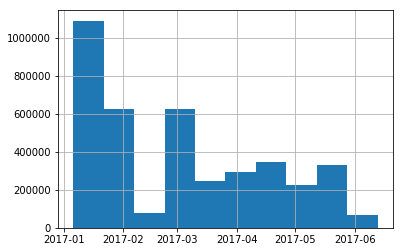

In [73]:
videoDetails_timestamp_firstwatch['Timestamp_y'].hist()

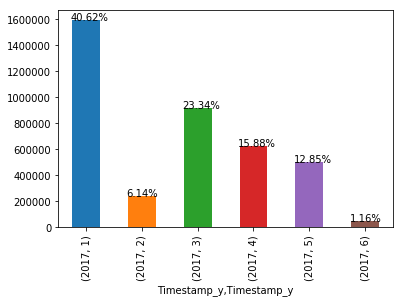

In [74]:
ax=videoDetails_timestamp_firstwatch.groupby([videoDetails_timestamp_firstwatch["Timestamp_y"].dt.year, videoDetails_timestamp_firstwatch["Timestamp_y"].dt.month])['VideoId'].count().plot(kind="bar")


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')


In [75]:
AppRegistered_Installed=pd.merge(registration,appUninstalled[['UserId','Date']],on='UserId',how='left')
AppRegistered_Installed.head()

,UserId,Date_x,Minute_Of_Day,Second,State,Country,Device,OS,Status,Sec_Of_Day,Date_y
0,d168e2b924124feaad13eae44a68fce9,20170106,0,8,35,1,1,2,Complete,8,NaN
1,deed7490952a6746610ee2ee9fd219b7,20170106,0,8,7,40,1,1,Completed,8,20170106.0
2,13d9f55e297d7d9c219fbe9085e1006c,20170106,0,28,35,1,1,2,Complete,28,20170513.0
3,fccc2c0abf5afabf242a70df7b4c9e69,20170106,0,52,39,1,1,1,Completed,52,20170116.0
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,0,52,38,1,1,1,Not Completed,52,20170320.0


In [35]:
AppRegistered_Installed['Date_y'] = AppRegistered_Installed.Date_y.fillna(0)


In [76]:
AppRegistered_Installed.head()

,UserId,Date_x,Minute_Of_Day,Second,State,Country,Device,OS,Status,Sec_Of_Day,Date_y
0,d168e2b924124feaad13eae44a68fce9,20170106,0,8,35,1,1,2,Complete,8,NaN
1,deed7490952a6746610ee2ee9fd219b7,20170106,0,8,7,40,1,1,Completed,8,20170106.0
2,13d9f55e297d7d9c219fbe9085e1006c,20170106,0,28,35,1,1,2,Complete,28,20170513.0
3,fccc2c0abf5afabf242a70df7b4c9e69,20170106,0,52,39,1,1,1,Completed,52,20170116.0
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,0,52,38,1,1,1,Not Completed,52,20170320.0


In [77]:
AppRegistered_Installed['Date_y'][AppRegistered_Installed['Date_y'] != 0] = 1

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
AppRegistered_Installed.head()

,UserId,Date_x,Minute_Of_Day,Second,State,Country,Device,OS,Status,Sec_Of_Day,Date_y
0,d168e2b924124feaad13eae44a68fce9,20170106,0,8,35,1,1,2,Complete,8,1.0
1,deed7490952a6746610ee2ee9fd219b7,20170106,0,8,7,40,1,1,Completed,8,1.0
2,13d9f55e297d7d9c219fbe9085e1006c,20170106,0,28,35,1,1,2,Complete,28,1.0
3,fccc2c0abf5afabf242a70df7b4c9e69,20170106,0,52,39,1,1,1,Completed,52,1.0
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,0,52,38,1,1,1,Not Completed,52,1.0


In [79]:
AppRegistered_Installed=AppRegistered_Installed[['UserId','Status','Date_y']].copy()
AppRegistered_Installed.head()

,UserId,Status,Date_y
0,d168e2b924124feaad13eae44a68fce9,Complete,1.0
1,deed7490952a6746610ee2ee9fd219b7,Completed,1.0
2,13d9f55e297d7d9c219fbe9085e1006c,Complete,1.0
3,fccc2c0abf5afabf242a70df7b4c9e69,Completed,1.0
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,Not Completed,1.0


In [40]:
AppRegistered_Installed.rename(columns = {'Date_y':'UnInstalled'}, inplace = True)
AppRegistered_Installed.head()

,UserId,Status,UnInstalled
0,d168e2b924124feaad13eae44a68fce9,Complete,0.0
1,deed7490952a6746610ee2ee9fd219b7,Completed,1.0
2,13d9f55e297d7d9c219fbe9085e1006c,Complete,1.0
3,fccc2c0abf5afabf242a70df7b4c9e69,Completed,1.0
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,Not Completed,1.0


In [80]:
fullVideoInfo['Device'].value_counts()

1    5164033
2     322991
0       2529
3       2423
Name: Device, dtype: int64

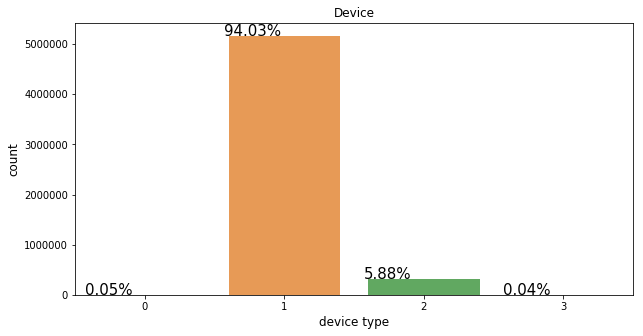

In [81]:
fullVideos_Device_valueCount =fullVideoInfo['Device'].value_counts()
plt.figure(figsize=(10,5))
ax=sns.barplot(fullVideos_Device_valueCount.index, fullVideos_Device_valueCount.values, alpha=0.8)
ax.set_title('Device')
ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('device type', fontsize=12)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')
plt.show()


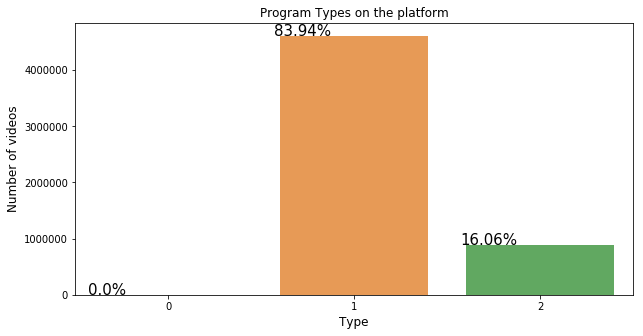

In [82]:
fullVideos_OS_valueCount =fullVideoInfo['OS'].value_counts()
plt.figure(figsize=(10,5))
ax=sns.barplot(fullVideos_OS_valueCount.index, fullVideos_OS_valueCount.values, alpha=0.8)
ax.set_title('Program Types on the platform')
ax.set_ylabel('Number of videos', fontsize=12)
ax.set_xlabel('Type', fontsize=12)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')
plt.show()


In [83]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

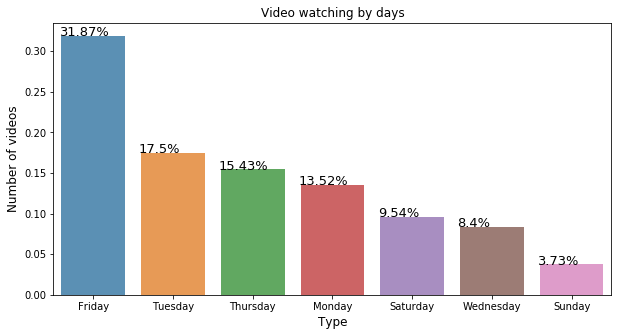

In [85]:
releaseDay_value=videoDetails_timestamp_firstwatch['Timestamp_y'].dt.dayofweek.map(dayOfWeek).value_counts(normalize=True)
plt.figure(figsize=(10,5))
ax=sns.barplot(releaseDay_value.index, releaseDay_value.values, alpha=0.8)

ax.set_alpha(0.8)
ax.set_title('Video watching by days')
ax.set_ylabel('Number of videos', fontsize=12)
ax.set_xlabel('Type', fontsize=12)
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='black')

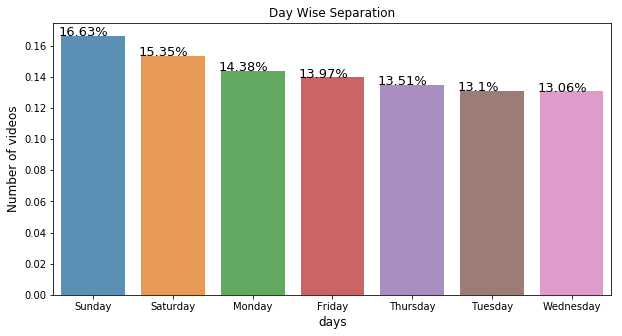

In [86]:
#fullVideoInfo
watchedDay_value=fullVideoInfo['Timestamp'].dt.dayofweek.map(dayOfWeek).value_counts(normalize=True)
plt.figure(figsize=(10,5))
ax=sns.barplot(watchedDay_value.index, watchedDay_value.values, alpha=0.8)
ax.set_title('Day Wise Separation')
ax.set_ylabel('Number of videos', fontsize=12)
ax.set_xlabel('days', fontsize=12)


totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='black')

In [88]:
registration_timestamp=time_stamp(registration,'Date','Minute_Of_Day','Second')
registration_timestamp.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Status,Sec_Of_Day,Timestamp
0,d168e2b924124feaad13eae44a68fce9,2017-01-06,0 days,00:00:08,35,1,1,2,Complete,8,2017-01-06 00:00:08
1,deed7490952a6746610ee2ee9fd219b7,2017-01-06,0 days,00:00:08,7,40,1,1,Completed,8,2017-01-06 00:00:08
2,13d9f55e297d7d9c219fbe9085e1006c,2017-01-06,0 days,00:00:28,35,1,1,2,Complete,28,2017-01-06 00:00:28
3,fccc2c0abf5afabf242a70df7b4c9e69,2017-01-06,0 days,00:00:52,39,1,1,1,Completed,52,2017-01-06 00:00:52
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,2017-01-06,0 days,00:00:52,38,1,1,1,Not Completed,52,2017-01-06 00:00:52


In [89]:
registration_timestamp['Status'].value_counts()

Completed        205853
Not Completed    100608
Complete          23118
Name: Status, dtype: int64

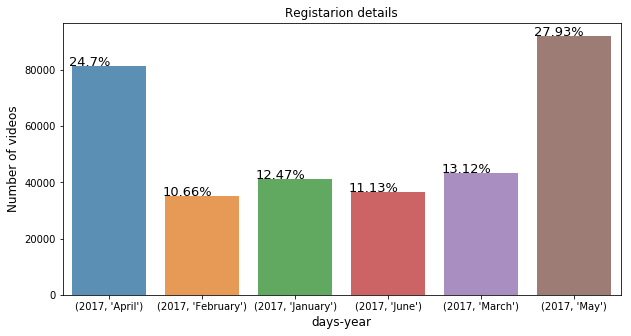

In [90]:
registrations_value=registration_timestamp.groupby([registration_timestamp["Timestamp"].dt.year, registration_timestamp["Timestamp"].dt.month_name(locale = 'English')])['UserId'].count()
plt.figure(figsize=(10,5))
ax=sns.barplot(registrations_value.index, registrations_value.values, alpha=0.8)
ax.set_title('Registarion details')
ax.set_ylabel('Number of videos', fontsize=12)
ax.set_xlabel('days-year', fontsize=12)


totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='black')

In [91]:
videoDetails_timestamp_firstwatch.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day,Timestamp_x,VStatus,Timestamp_y
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017-01-06,0 days,00:00:04,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,4,2017-01-06 00:00:04,Details,2017-01-06 00:00:04
1,12060efd8b68ea562b265d0129a8af1f,2017-01-06,0 days,00:00:16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,16,2017-01-06 00:00:16,Details,2017-01-06 00:00:16
2,9151ab2a901458f27e36548d4a8dc011,2017-01-06,0 days,00:00:20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,20,2017-01-06 00:00:20,Details,2017-01-06 00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,2017-01-06,0 days,00:00:20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,20,2017-01-06 00:00:20,Details,2017-01-06 00:00:20
4,435d41ae019cb8db785483793859c9a8,2017-01-06,0 days,00:00:20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,20,2017-01-06 00:00:20,Details,2017-01-06 00:00:20


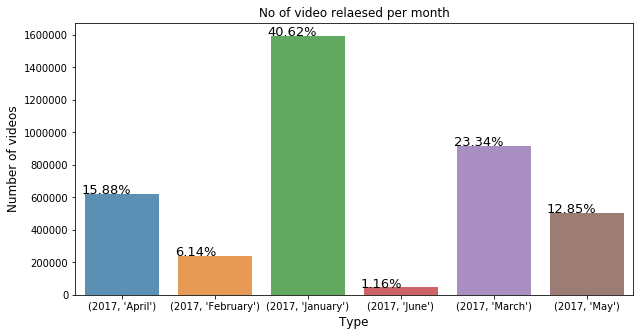

In [92]:
videoTypeInMonth=videoDetails_timestamp_firstwatch.groupby([videoDetails_timestamp_firstwatch["Timestamp_y"].dt.year, videoDetails_timestamp_firstwatch["Timestamp_y"].dt.month_name(locale = 'English')])['VideoId'].count()
plt.figure(figsize=(10,5))
ax=sns.barplot(videoTypeInMonth.index, videoTypeInMonth.values, alpha=0.8)
ax.set_title('No of videos relaesed per month')
ax.set_ylabel('Number of videos', fontsize=12)
ax.set_xlabel('Type', fontsize=12)


totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='black')

In [71]:
videoStarted_timestamp=time_stamp(videoStarted,'Date','Minute_Of_Day','Second')
videoStarted_timestamp.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Timestamp,VStatus
0,0280dfdd112732a3ac12b12dc770b7af,2017-01-06,0 days,00:00:08,35,Romance,vod,Movies,1,1,2,36a27b379622f342ec87f9aafadb8f94,2017-01-06 00:00:08,Started
1,435d41ae019cb8db785483793859c9a8,2017-01-06,0 days,00:00:28,35,Anime,vod,TV Shows,1,1,1,a4d9b88c7ed63d723c70b358a857719c,2017-01-06 00:00:28,Started
2,1faf0ce0b98e02e1568702f516f01a78,2017-01-06,0 days,00:00:36,35,Drama,vod,TV Shows,1,1,1,806660cb47633263a24bbc53238a9a53,2017-01-06 00:00:36,Started
3,3ec691b9d2b5d53ef965fe59b1900b30,2017-01-06,0 days,00:00:48,35,Drama,vod,TV Shows,1,2,2,385114825a85d6878e7a0978f9ba5546,2017-01-06 00:00:48,Started
4,ff230d487a7139b65f33b54a4cbd2d9e,2017-01-06,0 days,00:00:56,35,Comedy,vod,Movies,1,1,1,368a480ec0ae105aee8320dd93483e39,2017-01-06 00:00:56,Started


In [69]:
def len_stamp (df,min_col, sec_col):
    '''
    Returns dataframe with timestamp after combining the date, minute and sec column for the given dataframe
    '''
    
    df[min_col] = pd.to_timedelta(df[min_col], unit='m')
    df[sec_col] = pd.to_timedelta(df[sec_col], unit='s')
    df['length_video'] = df[min_col] + df[sec_col]
    return df

In [70]:
len_video=len_stamp(df_new,'Minute_Of_Day','Second')

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [71]:
len_video.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day,Timestamp,VStatus,length_video
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017-01-06,0 days,00:00:04,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,4,2017-01-06 00:00:04,Details,00:00:04
1,12060efd8b68ea562b265d0129a8af1f,2017-01-06,0 days,00:00:16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,16,2017-01-06 00:00:16,Details,00:00:16
2,9151ab2a901458f27e36548d4a8dc011,2017-01-06,0 days,00:00:20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,20,2017-01-06 00:00:20,Details,00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,2017-01-06,0 days,00:00:20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,20,2017-01-06 00:00:20,Details,00:00:20
4,435d41ae019cb8db785483793859c9a8,2017-01-06,0 days,00:00:20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,20,2017-01-06 00:00:20,Details,00:00:20


In [72]:
len_video.shape

(4092, 16)

In [73]:
len_video['length_video'].value_counts()

11:59:56    9
21:57:36    7
19:06:08    6
20:31:56    6
09:56:44    6
00:17:52    4
09:56:56    4
15:36:32    4
17:06:20    4
20:51:12    4
21:24:24    4
18:18:48    4
17:05:36    4
09:30:28    4
10:56:04    4
19:17:16    4
17:50:44    4
13:36:04    4
15:14:24    4
00:31:04    4
10:57:08    4
21:22:40    4
09:56:52    4
02:50:00    4
20:00:48    4
23:55:56    4
00:31:00    4
14:54:48    4
21:09:00    3
18:05:16    3
           ..
22:07:36    1
22:07:20    1
22:07:04    1
17:13:40    1
13:05:16    1
22:06:16    1
17:17:40    1
07:33:00    1
22:13:28    1
22:14:00    1
17:27:00    1
21:11:28    1
12:32:32    1
13:39:36    1
17:25:08    1
02:45:28    1
17:24:52    1
02:45:12    1
02:44:56    1
22:17:12    1
16:45:08    1
02:43:52    1
12:29:04    1
21:13:36    1
07:35:08    1
12:28:16    1
22:14:32    1
22:14:16    1
17:20:52    1
00:00:16    1
Name: length_video, Length: 3360, dtype: int64

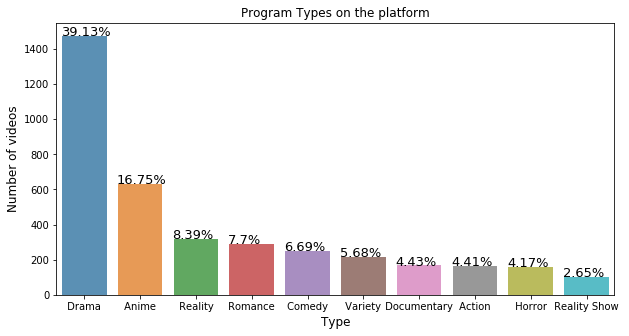

In [53]:
videolen_valueCount  =len_video.groupby('Genre')['length_video'].count().nlargest(10)

plt.figure(figsize=(10,5))
ax=sns.barplot(videolen_valueCount.index, videolen_valueCount.values, alpha=0.8);
ax.set_alpha(0.8)
ax.set_title('Program Types on the platform')
ax.set_ylabel('Number of videos', fontsize=12)
ax.set_xlabel('Type', fontsize=12)
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.02, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='Black')

In [54]:
data['title'].value_counts()[:20].plot(kind='barh')

NameError: name 'data' is not defined

In [83]:
videolen_valueCount_1  =len_video.groupby(['UserId','Device','Country','OS','Genre'])['length_video'].count().nlargest(30)
videolen_valueCount_1

UserId                            Device  Country  OS  Genre         
16c660a8b759200cb871879d044ce3dd  1       40       2    Documentary      114
                                                        Reality          114
c0c01bf234c84f928218ca89f860f183  1       40       1    Reality           47
bcaaa3709c0a7f2fb95cc142e6ac7a7a  1       255      2    Anime             39
0c4f219a92d58f53703fa82dc9ce39cf  1       1        2    Drama             32
64ed8bdb57baf20156ab9d525a16e8be  1       1        1    Drama             30
93c530edfa450df6ee7e14d64f6c15ef  1       40       1    Crime             29
03dbdb4b11e497a2a0afec086767581d  1       1        1    Romance           23
d0cc4252d41c368dd75350d91724c211  1       1        1    Drama             23
9e33404443f7107da1895d3561bcc9b3  1       1        1    Drama             22
f538a38ad73c0e5f240655459e225397  1       1        1    Horror            22
f23f9b51532d64212d5f13143b803308  1       1        2    Drama             20
414890

In [79]:
videolen_valueCount_2  =len_video.groupby('UserId')['VideoId'].count().nlargest(30)
videolen_valueCount_2

UserId
16c660a8b759200cb871879d044ce3dd    232
c0c01bf234c84f928218ca89f860f183     48
bcaaa3709c0a7f2fb95cc142e6ac7a7a     39
93c530edfa450df6ee7e14d64f6c15ef     35
0c4f219a92d58f53703fa82dc9ce39cf     32
64ed8bdb57baf20156ab9d525a16e8be     30
dfb620972b18d528cc53cb440569a6d4     26
f538a38ad73c0e5f240655459e225397     24
03dbdb4b11e497a2a0afec086767581d     23
d0cc4252d41c368dd75350d91724c211     23
e049f0061d5cb3ee1b6688da0b759c8a     23
9e33404443f7107da1895d3561bcc9b3     22
6d51418c537c27943c2385c0813004ac     20
f23f9b51532d64212d5f13143b803308     20
6823ff359a96c599f5fe4e988458d3c8     19
414890982c51ddab81823f6186f09a72     18
6bf7c866affbf98d03b1ef0c5d610ca7     18
3fd0fb32281d0e0100c38d6a9b5c041c     17
60c5d3732a972c93a8b6b11008fc3962     17
aa2384d8267cdd3a2da77381c4932779     17
6c790e28e7979218274261b4f464619a     15
d42ffa8a98582c71342fb8b00a38b622     15
d49283edf3d70698c89c542fc2bfc3b7     15
2ec47f1ff7fe5e82dc6b72256249a70a     14
6c7b5426861b8e25fb36ee40ceb1f9bf 

In [89]:

table = pd.pivot_table(videoStarted[["UserId", "ProgramType"]].append(videoDetails[["UserId", "ProgramType"]]), index = ['UserId'], columns=['ProgramType'], aggfunc=len)

In [90]:
data = pd.merge(data, table, on=['UserId'], how = 'left')
data.head()

NameError: name 'data' is not defined

In [93]:
fullVideoInfoModelData= fullVideoInfo.copy()
fullVideoInfoModelData.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day,Timestamp,VStatus
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017-01-06,0 days,00:00:04,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,4,2017-01-06 00:00:04,Details
1,12060efd8b68ea562b265d0129a8af1f,2017-01-06,0 days,00:00:16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,16,2017-01-06 00:00:16,Details
2,9151ab2a901458f27e36548d4a8dc011,2017-01-06,0 days,00:00:20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,20,2017-01-06 00:00:20,Details
3,1faf0ce0b98e02e1568702f516f01a78,2017-01-06,0 days,00:00:20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,20,2017-01-06 00:00:20,Details
4,435d41ae019cb8db785483793859c9a8,2017-01-06,0 days,00:00:20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,20,2017-01-06 00:00:20,Details


In [94]:
fullVideoInfoModelData.drop(['Date','Minute_Of_Day','Second'], axis=1, inplace=True)
fullVideoInfoModelData.head()

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day,Timestamp,VStatus
0,dc93d200565e5bf6e6fc55adb1c5ba06,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,4,2017-01-06 00:00:04,Details
1,12060efd8b68ea562b265d0129a8af1f,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,16,2017-01-06 00:00:16,Details
2,9151ab2a901458f27e36548d4a8dc011,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,20,2017-01-06 00:00:20,Details
3,1faf0ce0b98e02e1568702f516f01a78,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,20,2017-01-06 00:00:20,Details
4,435d41ae019cb8db785483793859c9a8,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,20,2017-01-06 00:00:20,Details


In [95]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
fullVideoInfoModelData['UserId'] = le.fit_transform(fullVideoInfoModelData['UserId'])
fullVideoInfoModelData['State'] = le.fit_transform(fullVideoInfoModelData['State'])
fullVideoInfoModelData['Genre'] = le.fit_transform(fullVideoInfoModelData['Genre'])
fullVideoInfoModelData['Category'] = le.fit_transform(fullVideoInfoModelData['Category'])
fullVideoInfoModelData['ProgramType'] = le.fit_transform(fullVideoInfoModelData['ProgramType'])
fullVideoInfoModelData['Country'] = le.fit_transform(fullVideoInfoModelData['Country'])
fullVideoInfoModelData['Device'] = le.fit_transform(fullVideoInfoModelData['Device'])
fullVideoInfoModelData['OS'] = le.fit_transform(fullVideoInfoModelData['OS'])
fullVideoInfoModelData['VideoId'] = le.fit_transform(fullVideoInfoModelData['VideoId'])
fullVideoInfoModelData['Sec_Of_Day'] = le.fit_transform(fullVideoInfoModelData['Sec_Of_Day'])
fullVideoInfoModelData['Timestamp'] = le.fit_transform(fullVideoInfoModelData['Timestamp'])
fullVideoInfoModelData['VStatus'] = le.fit_transform(fullVideoInfoModelData['VStatus'])
#display the initial records
fullVideoInfoModelData.head()

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day,Timestamp,VStatus
0,227293,34,14,1,2,1,2,1,900,1,0,0
1,18481,34,26,1,1,1,1,1,3133,4,2,0
2,149419,0,14,1,2,30,1,1,779,5,3,0
3,32483,34,14,1,2,1,1,1,6948,5,3,0
4,69345,34,3,1,2,1,1,1,1213,5,3,0


In [121]:
#Cluster the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(fullVideoInfoModelData)
labels = kmeans.labels_

#Glue back to originaal data
fullVideoInfoModelData['clusters'] = labels

fullVideoInfoModelData.head()

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Sec_Of_Day,Timestamp,VStatus,clusters
0,227293,34,14,1,2,1,2,1,900,1,0,0,0
1,18481,34,26,1,1,1,1,1,3133,4,2,0,0
2,149419,0,14,1,2,30,1,1,779,5,3,0,0
3,32483,34,14,1,2,1,1,1,6948,5,3,0,0
4,69345,34,3,1,2,1,1,1,1213,5,3,0,0


In [122]:
fullVideoInfoModelData['clusters'].value_counts()

1    3533697
0    1958279
Name: clusters, dtype: int64

In [123]:
X = fullVideoInfoModelData.drop(['clusters'],axis=1)
#assigning the Oppurtunity Result column as target
y = fullVideoInfoModelData['clusters'].copy()

print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: clusters, dtype: int32


In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [125]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression as lm
model=lm().fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    391854
           1       0.95      1.00      0.97    706542

   micro avg       0.97      0.97      0.97   1098396
   macro avg       0.97      0.95      0.96   1098396
weighted avg       0.97      0.97      0.97   1098396



In [126]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression as lm
model=lm().fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred.round()))

0.9657373114978569


In [119]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier as lm
model=lm().fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred.round()))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    400331
           1       1.00      1.00      1.00    454174
           2       1.00      1.00      1.00    243891

   micro avg       1.00      1.00      1.00   1098396
   macro avg       1.00      1.00      1.00   1098396
weighted avg       1.00      1.00      1.00   1098396



In [113]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
model=neigh.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    707078
           1       1.00      1.00      1.00    391318

   micro avg       1.00      1.00      1.00   1098396
   macro avg       1.00      1.00      1.00   1098396
weighted avg       1.00      1.00      1.00   1098396

